In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)
np.set_printoptions(suppress=True)

In [27]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix

from sklearn.decomposition import PCA



In [5]:
file_paths = {
              'in_train':'../../../data/prepared/activity_log_train__ml_prepared.csv',
              'in_test':'../../../data/prepared/activity_log_test__ml_prepared.csv',
              'in_missing':'../../../data/prepared/activity_log_missing__ml_prepared.csv',
             }

df = pd.read_csv(file_paths['in_test'])

df.head()

,elapsed_distance,moving_time,avg_speed,ride_cruise_speed,ride_avg_power,peak_20min_power,training_window_0,training_window_1,training_window_2,training_window_3,training_window_4,training_window_5,training_window_6,training_window_7,training_window_8,training_window_9,training_window_10,training_window_11,training_window_12,simple_exertion
0,-0.583768,-0.600478,-0.009533,-0.858793,-0.328163,-0.616149,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,-0.317711,0.039052,-1.259373,-1.102532,-1.286629,-1.775306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.651350,0.480656,0.223983,1.935312,1.236084,0.202598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,-0.182067,0.699772,-2.201339,-1.072299,-2.183943,-0.507488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,0.861471,0.334257,1.334372,0.176060,1.183030,0.621841,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [6]:
target_col = 'simple_exertion'

In [21]:
X_test, y_test = df.drop(target_col, axis=1).values, df[target_col].values

In [22]:
X_test = X_test[:,0:6] # only using the numerical columns based on the training
print(X_test.shape)

(54, 6)


In [8]:
def PCA_plot(X_train, y_train):
    # Create and plot the first 2 Principle Components
    pca = PCA(n_components=2)
    pca.fit(X_train)
    X_pca = pca.transform(X_train)
    
    # create dataframe for plotting
    df_pca = pd.DataFrame(X_pca, columns=['pca_1','pca_2'])
    df_pca['labels'] = y_train
    df_pca['labels'] = df_pca['labels'].replace({1:'EASY',2:'NORMAL',3:'HARD'})
    
    # plot the data
    fig = plt.figure(figsize=(8,8))
    _ = sns.scatterplot(x='pca_1',y='pca_2', data=df_pca, hue='labels', s=50, alpha=0.8)
    _ = plt.xlabel('First Principle Component', fontsize=16)
    _ = plt.ylabel('Second Principle Component', fontsize=16)
    _ = plt.grid()
    

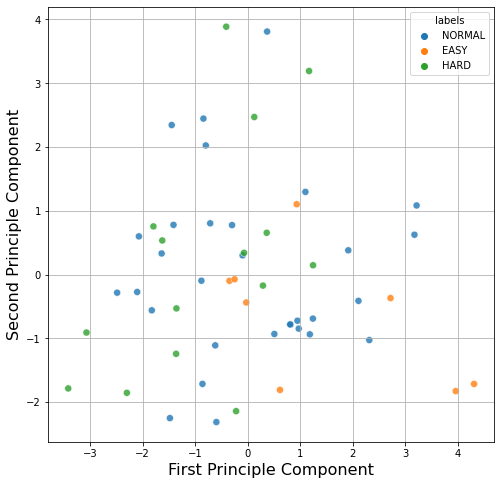

In [9]:
PCA_plot(X,y)

# 1. Load Models

In [10]:
import pickle

model_lr = pickle.load(open('logistic_regression_model.pkl','rb'))
model_rf = pickle.load(open('random_forest_model.pkl','rb'))

# 2. Predict on Test

## 2a. Logistic Regression

In [23]:
y_pred_lr = model_lr.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred_lr)

0.5370370370370371

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)

In [29]:
conf_matrix

array([[ 1,  7,  0],
       [ 1, 25,  5],
       [ 0, 12,  3]], dtype=int64)

## 2b. Random Forest

In [25]:
y_pred_rf = model_rf.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred_rf)

0.5740740740740741

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

In [31]:
conf_matrix

array([[ 1,  6,  1],
       [ 0, 27,  4],
       [ 0, 12,  3]], dtype=int64)